In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers - Train.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,No
1,15810944,Male,35,20000,No
2,15668575,Female,26,43000,No
3,15603246,Female,27,57000,No
4,15804002,Male,19,76000,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          329 non-null    int64 
 1   Gender           329 non-null    object
 2   Age              329 non-null    int64 
 3   EstimatedSalary  329 non-null    int64 
 4   Purchased        329 non-null    object
dtypes: int64(3), object(2)
memory usage: 13.0+ KB


In [4]:
X = df.drop(columns = ['Purchased', 'User ID'])
y = df['Purchased']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [7]:
import os

In [8]:
os.chdir(r'C:\Users\jeanp\Notebooks\06. Aprendizaje Supervisado\src')

In [9]:
from preprocessing import preprocessing

In [10]:
X_train_df, X_test_df = preprocessing(X_train, X_test)

C:\Users\jeanp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
X_train_df.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
255,1.608806,0.572368,1.0,0.0
56,-1.238298,-0.622333,1.0,0.0
221,-0.060186,0.600814,0.0,1.0
10,-0.943770,0.287916,1.0,0.0
211,1.608806,2.279085,0.0,1.0


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

modelos = []

modelos.append(('LR', LogisticRegression()))
modelos.append(('DT', DecisionTreeClassifier()))
modelos.append(('KN', KNeighborsClassifier()))
modelos.append(('GN', GaussianNB()))
modelos.append(('SV', SVC()))

In [13]:
resultados = []
nombres = []
metrica = 'accuracy'

for nombre, modelo in modelos:
    cv_resultado = cross_val_score(modelo, X_train_df, y_train, scoring = metrica, cv=5)
    resultados.append(cv_resultado)
    nombres.append(nombre)
    print(f'{nombre}: {cv_resultado.mean()}, ({cv_resultado.std()})')

LR: 0.8347826086956521, (0.010649955403405116)
DT: 0.8782608695652174, (0.02948839123097941)
KN: 0.8869565217391304, (0.02129991080681023)
GN: 0.8478260869565218, (0.030743773095067265)
SV: 0.8869565217391304, (0.04215373789057678)


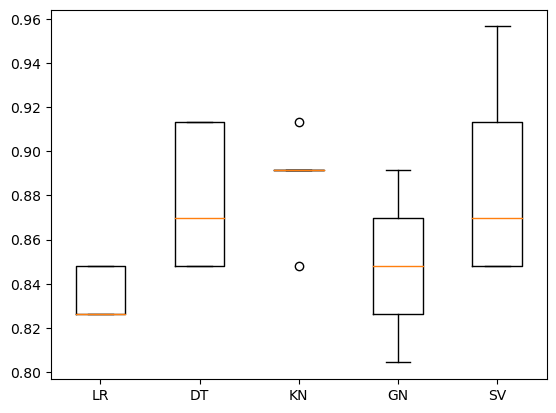

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nombres)
plt.show()

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train_df, y_train)

KNeighborsClassifier()

In [16]:
import pickle

In [17]:
modelo_knn_mall = 'modelo_knn_mall.pkl'
pickle.dump(knn, open(modelo_knn_mall, 'wb'))